# Installation 
#### Anaconda 3-4.2.0 (or higher)
#### Create virtual environment >> conda create -n yourenvname
#### Activate virtual environment >>  conda activate yourenvname
#### Install torchvision (Installs pytorch too) >> conda install -c pytorch torchvision
#### Open Jupyter notebook >> jupyter notebook

In [3]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
import cv2 as cv
import glob
import pygame
from pygame import mixer
import mutagen.mp3
import imutils
# from skimage import io
image_size = 50

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Input Transformation
#### Convert the Numpy arrays to PyTorch tensors and normalize input

In [14]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [15]:
my_transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(), transforms.Resize((image_size,image_size)),transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [16]:
my_transform2 = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(), transforms.Resize((image_size,image_size)),])

## Loading dataset
#### This is a built-in demo. Creating your own custom dataloader is discussed later

In [17]:
# trainset = datasets.MNIST('~/Documents/Sem9/TA-COL780/Pytorch_tutorial/', download=True, train=True, transform=transform)
# testset = datasets.MNIST('~/Documents/Sem9/TA-COL780/Pytorch_tutorial/', download=True, train=False, transform=transform2)
trainloader = torch.utils.data.DataLoader(custom_training_dataset, batch_size=128, shuffle=True)
print(len(custom_training_dataset))
print(len(trainloader))
testloader = torch.utils.data.DataLoader(custom_testing_dataset, batch_size=64, shuffle=True)
print(len(custom_testing_dataset))
print(len(testloader))
classes = ('0','1','2','3')

1655
13
610
10


In [18]:
dataiter = iter(trainloader)
n = dataiter.next()
images = n['image']
labels = n['label']

print(images.shape)
print(labels.shape)
# print(images)

torch.Size([128, 1, 50, 50])
torch.Size([128])


tensor(2)


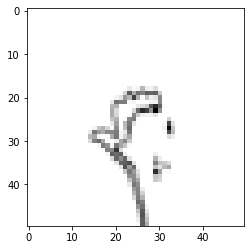

In [19]:
plt.imshow(images[7].numpy().squeeze(), cmap='gray_r'); 
print(labels[7])

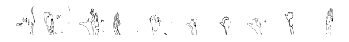

In [20]:
figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

torch.Size([64, 1, 50, 50])
torch.Size([64])
tensor(3)


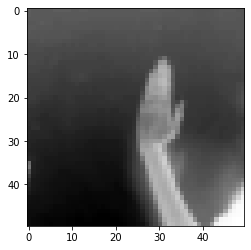

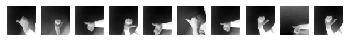

In [21]:
dataiter = iter(testloader)
n = dataiter.next()
images = n['image']
labels = n['label']

print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r'); 
print(labels[0])
figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Constructing the network

In [27]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv1_bn = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.conv2_bn = nn.BatchNorm2d(16)        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*11*11, 300)  
        self.fc2 = nn.Linear(300, 120)
        self.fc3 = nn.Linear(120, 4)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1_bn(self.conv1(x))), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#         print("inside forward")
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
# print(net)

In [28]:
net

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1936, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=4, bias=True)
)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Training the network

Accuracy of the network on the test images: 33 % 207 610
correct: [82, 68, 57]
incorrect: [136, 199, 68]
Accuracy of the network on the train images: 98 % 1633 1655
[1,     8] loss_val: 1.704
Accuracy of the network on the test images: 29 % 180 610
correct: [105, 39, 36]
incorrect: [113, 228, 89]
Accuracy of the network on the train images: 99 % 1654 1655
[2,     8] loss_val: 3.369
Accuracy of the network on the test images: 25 % 155 610
correct: [66, 35, 54]
incorrect: [152, 232, 71]
Accuracy of the network on the train images: 100 % 1655 1655
[3,     8] loss_val: 4.249
Accuracy of the network on the test images: 24 % 150 610
correct: [57, 37, 56]
incorrect: [161, 230, 69]
Accuracy of the network on the train images: 100 % 1655 1655
[4,     8] loss_val: 4.571
Accuracy of the network on the test images: 25 % 154 610
correct: [57, 39, 58]
incorrect: [161, 228, 67]
Accuracy of the network on the train images: 100 % 1655 1655
[5,     8] loss_val: 4.403
Finished Training


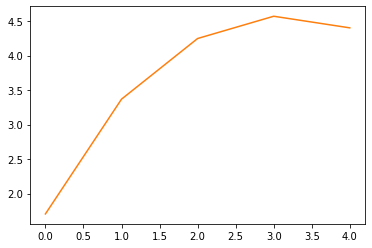

In [30]:
mini_batch = 28
mini_batch_loss = 8
loss_values = []
loss_values_val = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    running_loss_val =0.0
#     print(len(trainloader))
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs_train = data['image']
        labels_train = data['label']
#         print(i)
#         print(data['image'])

        # make the parameter gradients zero
        optimizer.zero_grad()

        # forward + backward + optimize
#         print("before for")
        outputs_train = net(inputs_train)
#         print("after for")
        loss_train = criterion(outputs_train, labels_train)
        loss_train.backward()
        optimizer.step()

        # print statistics
        running_loss += loss_train.item()
        if i % mini_batch == mini_batch-1:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / mini_batch))
            loss_values.append(running_loss/mini_batch)
            running_loss = 0.0
         
    correct = 0
    total = 0
    classes = [0,0,0]
    incorrect = [0,0,0]
    with torch.no_grad():
        for data in testloader:
            images = data['image']
            labels = data['label']
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            for j in range(len(labels)):
                if predicted[j]==labels[j]:
                    classes[labels[j]-1]+=1
                else:
                    incorrect[labels[j]-1]+=1
                    #print("predicted:",predicted[j],"labels",labels[j])
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total), correct, total)
    print("correct:",classes)
    print("incorrect:",incorrect)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images = data['image']
            labels = data['label']
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the train images: %d %%' % (
        100 * correct / total),correct,total)

    for i, data in enumerate(testloader,0):
        inputs_val = data['image']
        labels_val = data['label']

        outputs_val = net(inputs_val)
        loss_val = criterion(outputs_val, labels_val)

        # print statistics
        running_loss_val += loss_val.item()
        if i % mini_batch_loss == mini_batch_loss-1:    # print every 200 mini-batches
            print('[%d, %5d] loss_val: %.3f' %
                  (epoch + 1, i + 1, running_loss_val / mini_batch_loss))
            loss_values_val.append(running_loss_val/mini_batch_loss)
            running_loss_val = 0.0
        
# print(loss_values)        
plt.plot(loss_values)
plt.plot(loss_values_val)

print('Finished Training')

In [31]:
MODEL_PATH = './model'
# print("Model's state_dict:")
# for param_tensor in net.state_dict():
#     print(param_tensor, "\t", net.state_dict()[param_tensor].size())
    
#print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])
    
torch.save(net.state_dict(), MODEL_PATH)
print("model saved as ",MODEL_PATH)

model saved as  ./model


## Checking Train and Test accuracies

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images = data['image']
        labels = data['label']
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % (
    100 * correct / total))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images = data['image']
        labels = data['label']
        outputs = net(images)
#         print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        break

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

## Making your own custom Dataloader

In [9]:
class customDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.label = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.label.iloc[idx, 0])
#         print(img_name)
        image = cv.imread(img_name)
#         print(self.label)
        labels = self.label.iloc[idx, 1]
#         print(labels)
        labels = np.array(labels)
#         print(labels[0])
        
#         labels = labels.astype('float').reshape(-1, 1)
#         print(labels[0])
        sample = {'image': image, 'label': labels}

        if sample['image'] is not None:
            if self.transform:
                sample['image'] = self.transform(sample['image'])
#                 print(sample['image'].shape)

        return sample

In [12]:
#CUSTOM TRAIN DATASET
# custom_dataset = customDataset(csv_file='./dataset/labels.csv',root_dir='./dataset/images/',transform=transforms.Compose([Rescale(256),ToTensor()]))
custom_training_dataset = []
temp = customDataset(csv_file='./dataset/train_canny/labels.csv',root_dir='./dataset/train_canny/images/',transform=my_transform)

# images = glob.glob('./dataset/train/images/*.jpg')
# images.sort()
# count = []
for i in range(len(temp)):
    sample = temp[i]
#     print(sample.keys())
    if sample['image'] is not None:
        custom_training_dataset.append(sample)
print('done')

done


In [13]:
#CUSTOM TEST DATASET
# custom_dataset = customDataset(csv_file='./dataset/labels.csv',root_dir='./dataset/images/',transform=transforms.Compose([Rescale(256),ToTensor()]))
custom_testing_dataset = []
test_path = './dataset/test/'
temp = customDataset(csv_file=test_path+'labels.csv',root_dir=test_path+'images/',transform=my_transform)

for i in range(len(temp)):
    sample = temp[i]
#     print(sample.keys())
    if sample['image'] is not None:
        custom_testing_dataset.append(sample)
print('done')

done


In [32]:
MODEL_PATH = './model'
# model = torch.load(MODEL_PATH)
model = Net()
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1936, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=4, bias=True)
)

In [ ]:
capx = cv.VideoCapture(-1)
# print("here1")
ret = 1
fgbg = cv.bgsegm.createBackgroundSubtractorMOG()
# print("here2")
count = 0
predictions = []
classes = [0,1,2,3]
N = 10
n = 8
while ret:
    count = count+1
    ret,frame = capx.read()
    image = frame
    if ret==0:
        continue
    if count%10==0: 
        frame = fgbg.apply(frame)
        frame = cv.Canny(frame,20,55,apertureSize=3)
        my_transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(), transforms.Resize((image_size,image_size))])
        getTensor = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

        frame = getTensor(my_transform(frame)).float()
        frame = frame.unsqueeze(0)
        print(frame.shape)
        outputs = model(frame)
        _, predicted = torch.max(outputs.data, 1)
        predicted = np.array(predicted.squeeze())
        predictions.append(predicted)
        print(predicted,outputs)
        
        if len(predictions) > N:
            predictions = predictions[1:]
        for cls in classes:
            if predictions.count(cls) > n:
                print('found',cls,perdictions)
        
#         cv.imshow('output',np.array(frame.squeeze()))
        cv.imshow('output',image)
        cv.waitKey()

print('exited')

In [ ]:
a = 10
print(a)

In [ ]:
song_file = "audio/Summer of 69 Bryan Adams Complete Video with Vocals and instrumental.mp3"

mp3 = mutagen.mp3.MP3(song_file)
pygame.mixer.init(frequency=mp3.info.sample_rate//80)

pygame.mixer.music.load(song_file)
pygame.mixer.music.play()

In [ ]:
pygame.mixer.music.stop()

In [ ]:
frame = cv.imread('frames/2019-11-11-190038-right/220_2019-11-11-190038-right.jpg')
frame = np.array(frame)
print(frame.shape)
my_transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(), transforms.Resize((image_size,image_size))])
getTensor = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

frame = getTensor(my_transform(frame)).float()
frame = frame.unsqueeze(0)
print(frame.shape)
outputs = net(frame)
print(outputs)
plt.imshow(frame.squeeze())
plt.show()